In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.09 seconds.
Convergence after 6 epochs took 0.09 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (1 − \frac{αλ}{N} )b^{(t)} + α(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [16]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N1 = len(X_train)
N2 = len(X_test)
print(X_train)

[[-0.57349184 -0.19015688 -0.06584143 ... -2.2575668  -1.93628665
   1.65242231]
 [ 1.827818   -0.45810992  0.47407375 ... -0.32123197  0.31287131
  -1.494433  ]
 [ 2.08695359  0.6848935  -0.508604   ... -0.40808552  1.40853752
  -2.42760955]
 ...
 [-2.08516486  1.5645971  -1.08484902 ... -0.40558708  0.01228073
  -1.11181191]
 [ 2.03015673 -0.45333432 -0.84861675 ... -1.43846423 -5.28701236
   1.83665979]
 [-3.09055937  3.53475509  1.30110437 ...  1.91836221 -1.86397283
  -0.13396811]]


### Calculating initial log-loss for training data 

In [18]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own
def sigmoid(w,xi,b):
    a = 1/(1 + np.exp(-(np.dot(xi,w.transpose()) + b)))
    return a
def initial_log_loss(w,xi,yi,b,lambd):
    return (np.log10(sigmoid(w,xi,b))*yi + (1-yi) * np.log10((1 - sigmoid(w,xi,b))) + (lambd * np.dot(w,w.transpose()))).mean()

In [19]:
lambd = 1 # value of lambda
xi = X_train
yi = y_train
l1 = []
log_loss_train = initial_log_loss(w,xi,yi,b,lambd)
print("Initial log loss for train dataset:-",log_loss_train)
l1.append(log_loss_train)

Initial log loss for train dataset:- -0.3010299956639812


### Calculating initial log-loss for test data 

In [15]:
xt = X_test
yt = y_test
l2 = []
log_loss_test = initial_log_loss(w,xt,yt,b,lambd)
print("Initial log loss for test dataset:-",log_loss_test)
l2.append(log_loss_test)

Initial log loss for test dataset:- -0.3010299956639812


### Calculating Optimal w

In [16]:
def optimal_W(w,lambd,b,alpha,eta0):
    epoch = list(range(1,11))
    n_iterations = len(X_train)
    log_loss_tr = []
    log_loss_te = []
    for i in range(len(epoch)):
        for j in range(n_iterations):
            # updating weights and intercept
            w = (1 - (alpha*lambd)/N1) * w + (alpha * X_train[j] *(y_train[j] - sigmoid(w,X_train[j],b)))
            b = (b + alpha * (y_train[j] - sigmoid(w,X_train[j],b)))
        
        # Calculating log loss with updated weights and intercept for train dataset
        k1 = ((-1/N1) * (np.log10(sigmoid(w,X_train,b))*y_train + (1-y_train) * np.log10((1 - sigmoid(w,X_train,b))))).mean()

        # Calculating log loss with updated weights and intercept for test dataset
        k2 = ((-1/N2) * (np.log10(sigmoid(w,X_test,b))*y_test + (1-y_test) * np.log10((1 - sigmoid(w,X_test,b))))).mean()
               
        
        log_loss_tr.append(k1)
        log_loss_te.append(k2)
    return w,b,log_loss_tr,log_loss_te,epoch

In [17]:
optimal_w,intercept,log_loss_tr,log_loss_te,epoch = optimal_W(w,lambd,b,alpha,eta0)

In [18]:
print(optimal_w)
print(intercept)

[-0.42309068  0.19093324 -0.14583948  0.33809687 -0.21191581  0.56516975
 -0.44533791 -0.09170384  0.2179251   0.16973428  0.19518968  0.00229258
 -0.07779896  0.33878111  0.02214647]
-0.8500720497882759


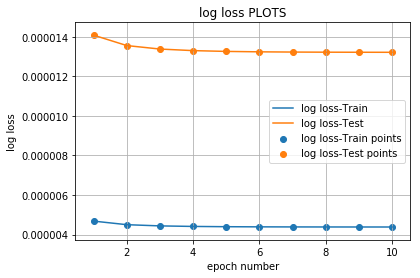

In [20]:
import matplotlib.pyplot as plt
plt.plot(epoch,log_loss_tr, label='log loss-Train')
plt.plot(epoch,log_loss_te, label='log loss-Test')

plt.scatter(epoch,log_loss_tr, label='log loss-Train points')
plt.scatter(epoch,log_loss_te, label='log loss-Test points')

plt.legend()
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.title("log loss PLOTS")
plt.grid()
plt.show()

In [0]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 1.35902934e-04,  7.15571169e-03, -1.50763324e-03,
         -2.49025574e-03,  1.19476006e-03, -1.76677259e-03,
          3.72211992e-03, -7.72662199e-04,  5.76021912e-03,
         -7.72849240e-03, -4.09688016e-03,  7.36552525e-03,
         -2.25926280e-06,  5.39142249e-03, -9.89505797e-03]]),
 array([0.00023241]))

In [21]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

1.6978933333333335
1.6986400000000001
